In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
#funcion delete
def delete_column(df, column_name):
    del df[column_name]
    return "column deleted"

## Import train DF

In [3]:
def conection(database):
    connection = create_engine("sqlite:///"+ database).connect()
    return connection
con = conection("../files/diamonds_train.db")

In [4]:
def query_diamond(query):
    df_diamonds_full_train = pd.read_sql_query(query,con)
    return df_diamonds_full_train

query_diamonds_full_train = '''
SELECT 
    d_prop.index_id,
    
    d_tran.carat,
    d_cut.cut,
    d_col.color,
    d_clar.clarity,

    d_dim.depth,
    d_dim.'table',
    d_dim.x,
    d_dim.y,
    d_dim.z,
    
    d_city.city,

    d_tran.price
    
FROM diamonds_properties as d_prop
    INNER JOIN diamonds_clarity as d_clar ON d_prop.clarity_id = d_clar.clarity_id
    INNER JOIN diamonds_color as d_col ON d_prop.color_id = d_col.color_id
    INNER JOIN diamonds_cut as d_cut ON d_prop.cut_id = d_cut.cut_id
    INNER JOIN diamonds_dimensions as d_dim ON d_prop.index_id = d_dim.index_id
    INNER JOIN diamonds_transactional as d_tran ON d_prop.index_id = d_tran.index_id
    INNER JOIN diamonds_city as d_city ON d_tran.city_id = d_city.city_id
'''

df_diamonds_train = query_diamond(query_diamonds_full_train)

In [5]:
df_diamonds_train.head()

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882


In [6]:
df_diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   carat     40455 non-null  float64
 2   cut       40455 non-null  object 
 3   color     40455 non-null  object 
 4   clarity   40455 non-null  object 
 5   depth     40455 non-null  float64
 6   table     40455 non-null  float64
 7   x         40455 non-null  float64
 8   y         40455 non-null  float64
 9   z         40455 non-null  float64
 10  city      40455 non-null  object 
 11  price     40455 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [7]:
#df_diamonds_train[df_diamonds_train["x"]<1].index.tolist()

In [8]:
#df_diamonds_train[df_diamonds_train["z"]<1].index.tolist()

In [9]:
#df_diamonds_train.drop(df_diamonds_train[df_diamonds_train["x"]<1].index,axis=0,inplace=True)
#df_diamonds_train.drop(df_diamonds_train[df_diamonds_train["z"]<1].index,axis=0,inplace=True)

In [10]:
#df_diamonds_train[df_diamonds_train["y"]<1].index.tolist()

In [11]:
#df_diamonds_train["z"].min()

In [12]:
#import plotly.express as px
#fig_inic = px.box(df_diamonds_train["price"])
#fig_inic.show()

In [13]:
df_diamonds_train["price"].max()

18823

In [14]:
df_diamonds_train

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,1.34,Ideal,G,VS1,62.7,57.0,7.10,7.04,4.43,Antwerp,10070
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,2.02,Good,F,SI2,57.1,60.0,8.31,8.25,4.73,Madrid,12615
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,1.01,Ideal,H,SI1,62.7,56.0,6.37,6.42,4.01,Kimberly,5457
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,0.33,Ideal,J,VS1,61.9,54.3,4.45,4.47,2.76,Kimberly,456


In [15]:
df_diamonds_train2 = df_diamonds_train.copy()
df_diamonds_train2["carat"] = df_diamonds_train2["carat"]+0.001
df_diamonds_train2["depth"] = df_diamonds_train2["depth"]+0.1
df_diamonds_train2["table"] = df_diamonds_train2["table"]+0.1
df_diamonds_train2["x"] = df_diamonds_train2["x"]+0.01
df_diamonds_train2["y"] = df_diamonds_train2["y"]+0.01
df_diamonds_train2["z"] = df_diamonds_train2["z"]+0.01
df_diamonds_train2["price"] = df_diamonds_train2["price"]+1
df_diamonds_train2

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.211,Premium,J,VS2,62.5,58.1,6.84,6.80,4.26,Dubai,4269
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.321,Very Good,H,VS2,63.1,57.1,4.36,4.39,2.76,Kimberly,506
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.711,Fair,G,VS1,65.6,55.1,5.63,5.54,3.66,Las Vegas,2687
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.411,Good,D,SI1,63.9,56.1,4.69,4.73,3.01,Kimberly,739
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.021,Ideal,G,SI1,60.6,59.1,6.56,6.52,3.96,Dubai,4883
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,1.341,Ideal,G,VS1,62.8,57.1,7.11,7.05,4.44,Antwerp,10071
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,2.021,Good,F,SI2,57.2,60.1,8.32,8.26,4.74,Madrid,12616
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,1.011,Ideal,H,SI1,62.8,56.1,6.38,6.43,4.02,Kimberly,5458
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,0.331,Ideal,J,VS1,62.0,54.4,4.46,4.48,2.77,Kimberly,457


In [16]:
df_diamonds_train3 = pd.concat([df_diamonds_train,df_diamonds_train2], axis=0).reset_index(drop=True)
df_diamonds_train3

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.210,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.320,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.710,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.410,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.020,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
80905,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,1.341,Ideal,G,VS1,62.8,57.1,7.11,7.05,4.44,Antwerp,10071
80906,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,2.021,Good,F,SI2,57.2,60.1,8.32,8.26,4.74,Madrid,12616
80907,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,1.011,Ideal,H,SI1,62.8,56.1,6.38,6.43,4.02,Kimberly,5458
80908,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,0.331,Ideal,J,VS1,62.0,54.4,4.46,4.48,2.77,Kimberly,457


In [17]:
df_diamonds_train = df_diamonds_train3.copy()
df_diamonds_train

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.210,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.320,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.710,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.410,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.020,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
80905,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,1.341,Ideal,G,VS1,62.8,57.1,7.11,7.05,4.44,Antwerp,10071
80906,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,2.021,Good,F,SI2,57.2,60.1,8.32,8.26,4.74,Madrid,12616
80907,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,1.011,Ideal,H,SI1,62.8,56.1,6.38,6.43,4.02,Kimberly,5458
80908,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,0.331,Ideal,J,VS1,62.0,54.4,4.46,4.48,2.77,Kimberly,457


### quitar outliers

In [18]:
#df_diamonds_train[df_diamonds_train["carat"]>=4]

In [19]:
#df_diamonds_train.drop(df_diamonds_train[df_diamonds_train["carat"]>=4].index,axis=0,inplace=True)

In [20]:
#df_diamonds_train= df_diamonds_train.reset_index(drop=True)
#df_diamonds_train.head()

## Import test DF

In [21]:
def import_csv_diamonds(location):
    df_diamonds_test = pd.read_csv(location)
    return df_diamonds_test

df_diamonds_test = import_csv_diamonds("../files/diamonds_test.csv")

In [22]:
df_diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


In [23]:
df_diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


## EDA

### TRAIN DF

#### a) category type

In [24]:
train_categorical_columns = ["cut","color","clarity","city"]

In [25]:
def df_columns_to_categorical_dtype(columns):
    df_diamonds_train_categorical_columns = df_diamonds_train[columns].astype("category")
    return df_diamonds_train_categorical_columns

df_diamonds_train_categorical_columns = df_columns_to_categorical_dtype(train_categorical_columns)

In [26]:
df_diamonds_train_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80910 entries, 0 to 80909
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cut      80910 non-null  category
 1   color    80910 non-null  category
 2   clarity  80910 non-null  category
 3   city     80910 non-null  category
dtypes: category(4)
memory usage: 317.8 KB


In [27]:
df_diamonds_train_categorical_columns.head()

,cut,color,clarity,city
0,Premium,J,VS2,Dubai
1,Very Good,H,VS2,Kimberly
2,Fair,G,VS1,Las Vegas
3,Good,D,SI1,Kimberly
4,Ideal,G,SI1,Dubai


#### b) encoding categorical columns

In [28]:
def enconding_categorical_columns(df, columns):
    enconding_categorical_columns = pd.get_dummies(df, columns=columns)#,drop_first=True)
    return enconding_categorical_columns

enconding_categorical_columns_train = enconding_categorical_columns(df_diamonds_train_categorical_columns, train_categorical_columns)
enconding_categorical_columns_train.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


 #### c) numeric columns

In [29]:
numeric_columns_train = ["carat","depth","table","x","y","z","price"]

In [30]:
df_diamonds_train_numeric = df_diamonds_train[numeric_columns_train]
df_diamonds_train_numeric.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [31]:
#df_diamonds_train_numeric["sum_xyz"] = df_diamonds_train_numeric["x"]+df_diamonds_train_numeric["y"]+df_diamonds_train_numeric["z"]

In [32]:
df_diamonds_train_concat = pd.concat([df_diamonds_train_numeric,enconding_categorical_columns_train], axis=1)
df_diamonds_train_concat.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,1.21,62.4,58.0,6.83,6.79,4.25,4268,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,505,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,2686,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,738,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,4882,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#delete_column(df_diamonds_train_concat, "x")
#delete_column(df_diamonds_train_concat, "y")
#delete_column(df_diamonds_train_concat, "z")

#### d) FEATURE SELECTION - drop columns highly correlated

In [34]:
#"""depth y table tienen -0,5 y -0,13 de correlación, el restode variables numéricas tienen 0,98 o 0,99"""

In [35]:
#delete_column(df_diamonds_train_concat, "depth")
#delete_column(df_diamonds_train_concat, "table")

In [36]:
df_diamonds_train_concat.head(5)

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,1.21,62.4,58.0,6.83,6.79,4.25,4268,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,505,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,2686,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,738,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,4882,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#analisis

In [38]:
#import matplotlib.pyplot as plt
#import cufflinks as cf 
#cf.go_offline()

In [39]:
#df_diamonds_train_concat.plot.hist(y='carat',bins = 20,figsize=(12, 6));

#### e) FEATURE ENGINEERING - group values - bins

### g) X_train, y_train

In [40]:
X_train = df_diamonds_train_concat.copy()

In [41]:
delete_column(X_train, "price")

'column deleted'

In [42]:
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,1.21,62.4,58.0,6.83,6.79,4.25,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#X_train[X_train["sum_xyz"]<1].index.tolist()

####  scaling - X_train

In [44]:
X_train_columns = X_train[["carat","x","y","z","depth","table"]].columns.tolist()
X_train_columns

['carat', 'x', 'y', 'z', 'depth', 'table']

In [45]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler


In [46]:
train_scaled = StandardScaler()

In [47]:
train_scaled_fit = train_scaled.fit_transform(X_train[["carat","x","y","z","depth","table"]])

In [48]:
X_train_scaled = pd.DataFrame(train_scaled_fit, columns = X_train_columns)

In [49]:
X_train_scaled.head()

,carat,x,y,z,depth,table
0,0.865954,0.974350,0.917616,1.015458,0.416841,0.225538
1,-1.005608,-1.231172,-1.184165,-1.136403,0.835666,-0.222076
2,-0.185486,-0.101731,-0.181240,0.154714,2.580768,-1.117304
3,-0.816349,-0.937696,-0.887648,-0.777760,1.394099,-0.669690
4,0.466407,0.725340,0.673426,0.585086,-0.909437,0.673152


In [50]:
X_train_scaled_concat = pd.concat([X_train_scaled,enconding_categorical_columns_train], axis=1)
X_train_scaled_concat.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0.865954,0.974350,0.917616,1.015458,0.416841,0.225538,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.005608,-1.231172,-1.184165,-1.136403,0.835666,-0.222076,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.185486,-0.101731,-0.181240,0.154714,2.580768,-1.117304,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.816349,-0.937696,-0.887648,-0.777760,1.394099,-0.669690,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.466407,0.725340,0.673426,0.585086,-0.909437,0.673152,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### y_train

In [51]:
y_train = df_diamonds_train_concat["price"]

In [52]:
#y_train.drop(y_train[X_train[X_train["sum_xyz"]<1].index],axis=0,inplace=True)

#### drop nans x train

In [53]:
#X_train_scaled_concat.drop(X_train_scaled_concat[X_train_scaled_concat["carat"].isnull()].index,axis=0,inplace=True)

In [54]:
#X_train_scaled_concat["carat"].isnull()

### TEST DF

#### a) category type

In [55]:
test_categorical_columns = ["cut","color","clarity","city"]

In [56]:
def df_columns_to_categorical_dtype(columns):
    df_diamonds_test_categorical_columns = df_diamonds_test[columns].astype("category")
    return df_diamonds_test_categorical_columns

df_diamonds_test_categorical_columns = df_columns_to_categorical_dtype(test_categorical_columns)

In [57]:
df_diamonds_test_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cut      13485 non-null  category
 1   color    13485 non-null  category
 2   clarity  13485 non-null  category
 3   city     13485 non-null  category
dtypes: category(4)
memory usage: 54.5 KB


In [58]:
df_diamonds_test_categorical_columns.head()

,cut,color,clarity,city
0,Very Good,F,SI1,Amsterdam
1,Ideal,J,VS1,Surat
2,Premium,H,SI1,Kimberly
3,Very Good,F,SI1,Kimberly
4,Very Good,F,VS1,Amsterdam


#### b) encoding categorical columns

In [59]:
def enconding_categorical_columns(df, columns):
    enconding_categorical_columns = pd.get_dummies(df, columns=columns)#,drop_first=True)
    return enconding_categorical_columns

enconding_categorical_columns_test = enconding_categorical_columns(df_diamonds_test_categorical_columns, test_categorical_columns)
enconding_categorical_columns_test.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
enconding_categorical_columns_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   cut_Fair            13485 non-null  uint8
 1   cut_Good            13485 non-null  uint8
 2   cut_Ideal           13485 non-null  uint8
 3   cut_Premium         13485 non-null  uint8
 4   cut_Very Good       13485 non-null  uint8
 5   color_D             13485 non-null  uint8
 6   color_E             13485 non-null  uint8
 7   color_F             13485 non-null  uint8
 8   color_G             13485 non-null  uint8
 9   color_H             13485 non-null  uint8
 10  color_I             13485 non-null  uint8
 11  color_J             13485 non-null  uint8
 12  clarity_I1          13485 non-null  uint8
 13  clarity_IF          13485 non-null  uint8
 14  clarity_SI1         13485 non-null  uint8
 15  clarity_SI2         13485 non-null  uint8
 16  clarity_VS1         13485 non-null  uint

#### c) numeric columns

In [61]:
numeric_columns_test = ["carat","depth","table","x","y","z"]

In [62]:
df_diamonds_test_numeric = df_diamonds_test[numeric_columns_test]
df_diamonds_test_numeric.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [63]:
#df_diamonds_test_numeric["sum_xyz"] = df_diamonds_test_numeric["x"]+df_diamonds_test_numeric["y"]+df_diamonds_test_numeric["z"]

In [64]:
#delete_column(df_diamonds_test_numeric, "x")
#delete_column(df_diamonds_test_numeric, "y")
#delete_column(df_diamonds_test_numeric, "z")

In [65]:
df_diamonds_test_concat = pd.concat([df_diamonds_test_numeric,enconding_categorical_columns_test], axis=1)
df_diamonds_test_concat.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0.79,62.7,60.0,5.82,5.89,3.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### d) FEATURE SELECTION - drop columns highly correlated

In [66]:
#"""depth y table tienen -0,5 y -0,13 de correlación, el restode variables numéricas tienen 0,98 o 0,99"""

In [67]:
#delete_column(df_diamonds_test_concat, "depth")
#delete_column(df_diamonds_test_concat, "table")

In [68]:
df_diamonds_test_concat.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0.79,62.7,60.0,5.82,5.89,3.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### e) FEATURE ENGINEERING - group values - bins

### g) X_test

In [69]:
X_test = df_diamonds_test_concat.copy()

In [70]:
X_test.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,0.79,62.7,60.0,5.82,5.89,3.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#X_test[X_test["sum_xyz"]<1]

####  scaling - X_test

In [72]:
X_test_columns = X_test[["carat","x","y","z","depth","table"]].columns.tolist()

In [73]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

In [74]:
test_scaled = StandardScaler()

In [75]:
test_scaled_fit = test_scaled.fit_transform(X_test[["carat","x","y","z","depth","table"]])

In [76]:
X_test_scaled = pd.DataFrame(test_scaled_fit, columns = X_test_columns)
X_test_scaled.head()

,carat,x,y,z,depth,table
0,-0.018412,0.075022,0.133236,0.173091,0.669500,1.121874
1,0.855078,0.964007,1.019395,0.870787,-0.514957,-0.219192
2,1.643349,1.475847,1.400444,1.404319,0.321131,1.568896
3,0.215939,0.317472,0.345914,0.487738,1.435914,-1.560258
4,-0.636246,-0.616411,-0.575691,-0.483564,0.808848,0.227830


In [77]:
X_test_scaled_concat = pd.concat([X_test_scaled,enconding_categorical_columns_test], axis=1)
X_test_scaled_concat.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,-0.018412,0.075022,0.133236,0.173091,0.669500,1.121874,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.855078,0.964007,1.019395,0.870787,-0.514957,-0.219192,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.643349,1.475847,1.400444,1.404319,0.321131,1.568896,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.215939,0.317472,0.345914,0.487738,1.435914,-1.560258,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.636246,-0.616411,-0.575691,-0.483564,0.808848,0.227830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.30)
    q3 = df_in[col_name].quantile(0.70)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## MODEL

### Lasso

In [79]:
#from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor()

In [81]:
model.fit(X_train_scaled_concat, y_train)

RandomForestRegressor()

In [82]:
predictions = model.predict(X_test_scaled_concat).clip(350,18000)

In [83]:
predictions

array([3006.46, 5388.9 , 9590.92, ..., 2745.15, 2128.31,  801.62])

In [84]:
id_predictions = [i for i in range(0,len(predictions))]

In [85]:
predictions_df = pd.DataFrame({"id":id_predictions , "price":predictions })

In [86]:
predictions_df.head()

,id,price
0,0,3006.46
1,1,5388.90
2,2,9590.92
3,3,4294.27
4,4,1699.25


In [87]:
predictions_df.to_csv("alvaro_saez_intento_dia3_model_RandomForestRegressor_todo_menos_dummies_todas_variables_sin_outliers_clip_datasetx2.csv", sep=",", index=False)

## train and test with split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_scaled_concat, y_train, test_size=0.2, random_state=42)

In [90]:
model2 = RandomForestRegressor()

In [91]:
model2.fit(X_train2, y_train2)

RandomForestRegressor()

In [92]:
predictions2 = model2.predict(X_test2).clip(300,30000)

In [93]:
predictions2.min()

353.76

## ERROR EVALUATION

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
check = pd.DataFrame({'Ground truth':y_test2, 'Predictions':predictions2, 'Diff':y_test2-predictions2})

In [96]:
#check.reset_index(inplace=True)

#check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));

In [97]:
rmse = mean_squared_error(y_test2, predictions2)**0.5
rmse

374.7612879189589

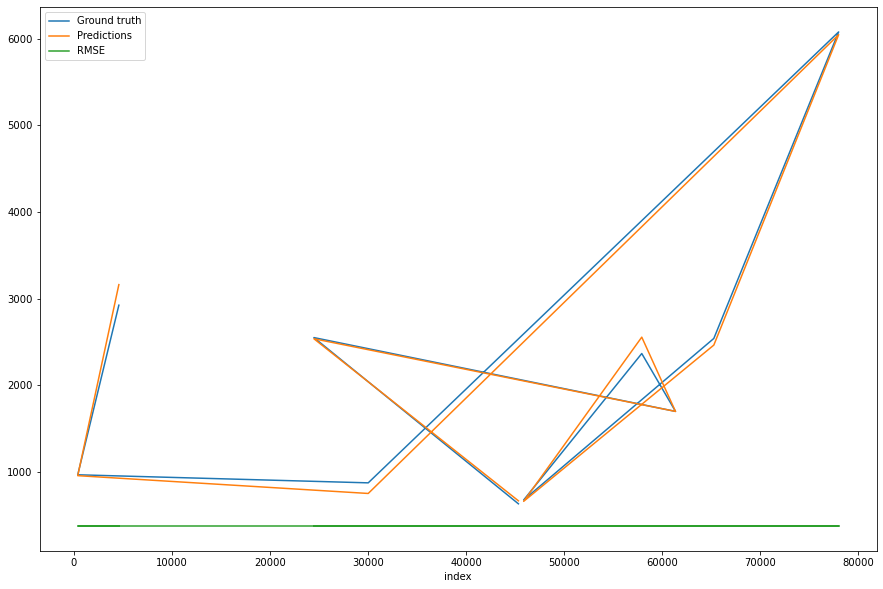

In [98]:
#Visual analysis

check = pd.DataFrame({'Ground truth':y_test2[:10],
                      'Predictions':predictions2[:10], 
                      'RMSE':rmse})
check.reset_index(inplace=True)
check.plot(x='index',
           y=['Ground truth', 'Predictions', 'RMSE'], 
           kind='line', 
           figsize=(15, 10)); 

In [99]:
predictions.max()

18000.0

In [100]:
#import plotly.express as px
#fig = px.box(predictions)
#fig.show()

In [101]:
predictions.tolist()

[3006.46,
 5388.9,
 9590.92,
 4294.27,
 1699.25,
 6037.44,
 4780.26,
 4140.99,
 5131.2,
 15977.9,
 4213.4,
 801.76,
 3186.37,
 1676.36,
 2391.77,
 1093.37,
 1478.44,
 3934.69,
 4171.2,
 883.27,
 2174.86,
 5252.43,
 4342.61,
 539.9,
 17460.09,
 1079.86,
 634.19,
 962.62,
 1650.0,
 827.89,
 10392.85,
 598.61,
 4006.64,
 721.47,
 625.74,
 2297.76,
 6539.55,
 2666.57,
 2904.27,
 630.77,
 500.84,
 8907.73,
 908.65,
 1917.88,
 10899.11,
 2506.91,
 888.06,
 902.43,
 1162.27,
 2880.26,
 588.13,
 4542.14,
 2871.36,
 7193.19,
 5542.64,
 2270.82,
 9444.17,
 2577.86,
 4471.89,
 2853.19,
 1247.46,
 487.35,
 6962.42,
 1158.58,
 8864.0,
 17478.97,
 961.24,
 10589.79,
 5252.17,
 9213.4,
 456.31,
 629.59,
 882.31,
 1258.58,
 5262.41,
 1805.63,
 8490.99,
 13908.78,
 2791.48,
 6504.1,
 11207.67,
 2120.64,
 14311.72,
 6565.14,
 815.7,
 8323.59,
 1017.63,
 12324.85,
 7571.93,
 13962.72,
 4988.76,
 1359.62,
 988.22,
 902.229,
 18000.0,
 497.77,
 13701.39,
 15342.48,
 13476.0,
 647.12,
 2519.41,
 769.2858333

In [102]:
fig2 = px.histogram(predictions)
fig2.show()

NameError: name 'px' is not defined

In [ ]:
check

In [ ]:
predictions.min()